Tabris Loveless
9/16/2022

In [18]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import math
from math import e
import numpy as np

def simpsons(f,start, end, parts):
    """
    Simpsons function calculates the simpson's rule approximation for the integrals of three functions.
    Modified from HW 5 to work with a given function.
    
    Arguments
    f: lambda
        numpy function for integral
    start : float
        starting value for for integral
    end : float
        ending value
    parts : int
        number of divisions for integral
    """
    
    deltax = (end - start)/parts

    integral = f(start) + f(end)
    
    for i in range (1,parts):
        step = start + i*deltax
        
        if i%2 == 0:
            integral = integral + 2*f(step)
            
        else:
            integral = integral + 4*f(step)
            
    integral = integral*(deltax/3)
    
    return integral
    
    
def plotcv(start, end):
    """
    Plots Cv of an Aluminum block with volume of 1000cm^3
    
    Args
        Start: Float
        starting value in kelvin for plot
        End: Float
        ending value in kelvin
        parts: int
        Resolution of plot
    """
    
    #integral portion of CV formula
    f = lambda x: ((x**4)*(e**x))/(((e**x)-1)**2)
    volume = 0.001
    roe = 6.022e28
    debye = 428 
    
    t_list = range(start, end)
    cv = []
    
    for t in t_list:
        #calulate integral portion then multiply by other half of equation
        #not sure how to fix the divide by zero issue,
        t_integral = simpsons(f, 1e-6, debye/t, 15)
        cv.append(9*volume*roe*((t/debye)**3)*t_integral)
    
    plt.plot(t_list, cv)
    plt.title('Cv of Aluminum')
    plt.xlabel('T')
    plt.ylabel('Cv')

    plt.show
    

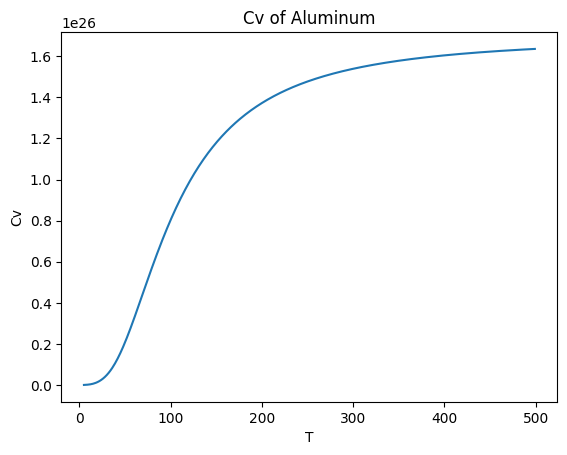

In [19]:
plotcv(5,500)